In [ ]:
#Importing all the required libraries 
import numpy as np
import math
import matplotlib.pyplot as plt

(1)... $$\sum_{n=1}^{N} A_{n} sinn\theta \left( \frac{4b}{a_0 [c_r - (c_r -c_t) cos\theta]} + \frac{n}{sin\theta}\right)= \alpha $$

$${\left(\frac{\displaystyle{c_{t}}} { \displaystyle{c_{r}}}=TR\right) }$$ \\
$$b=AR{\left(\frac{\displaystyle{TR}+1} { \displaystyle{2}}\right) }c_{r}$$

We Substitue the ct/cr ratio and b into equation (1) and obtain the following equation .
Taking $\displaystyle{a_0}=2\pi$ per radian

\begin{equation}
  \Sigma_{n=1}^N\displaystyle{ A_{ n } }\sin n\theta {\left(\frac{\displaystyle{2AR(TR+1)}} { \displaystyle{ a_0}[1-(1-TR)\cos\theta] }+\frac{ \displaystyle{ n } } { \displaystyle{ \sin\theta } }\right)}=\alpha
\end{equation}

In [ ]:
#Delta function(Aspect ratio,taper ratio,theta,N, flag)
#The functions returns delta values and the coefficient depending on flag
#If flag is true the function returns delta values
#If flag is false the function returns the coefficients
#N is a list of odd values as we need A1,A3...and so on

def delta_function(ar,taper_ratio,theta,N,flag):
    
    #Creating an 2D matrix that stores the values of the Coeffecients
    rows,cols=50,50
    X=np.zeros([rows,cols])
    B=np.ones((50,1),dtype=int)
    
    #Creating a matix to store the delta values for a given taper ratio
    delta=np.zeros(len(taper_ratio))
    
    count=0
    for tr in taper_ratio:
        j=0
        for th in theta:
            i=0
            for n in N:
              
              #The formula that is used is stated above formula(2). We have substituded a0=2*pi as given in the question 
                Z=((ar*(tr+1))/(math.pi*(1-((1-tr)*math.cos(math.radians(th)))))) + (n/math.sin(math.radians(th)))
                X[j][i]=math.sin(n*math.radians(th))*Z
                i=i+1
            j=j+1
        #Creating inverse of the coefficient matrix
        X_inv=np.linalg.inv(X)
        # Determining the A's 
        A=np.dot(X_inv,B)

        #Estimating Delta for a given taper and aspect ratio
        d=0
        for i in range(1,len(A)):
            d+=(2*i+1)*(A[i]/A[0])**2
        delta[count]=d
        count+=1
    #Returning the delta values or Co-efficient values based on the flag
    if(flag == True):
        return(delta)
    else:
        return(A)

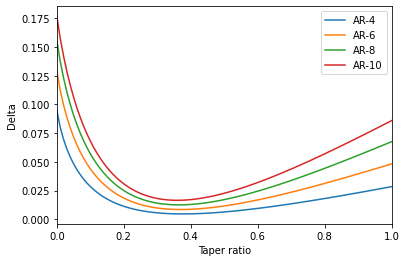

In [ ]:
#Solution for Question 1

theta=np.arange(1.8,91.8,1.8)  #Ignoring theta=0
taper_ratio=np.arange(0,1.01,0.01)
N=np.arange(1,100,2)

#plotting the Delta vs Taper ratio for various Aspect ratio
delta=delta_function(4,taper_ratio,theta,N,True)
plt.plot(taper_ratio,delta,label="AR-4")

delta=delta_function(6,taper_ratio,theta,N,True)
plt.plot(taper_ratio,delta,label="AR-6")

delta=delta_function(8,taper_ratio,theta,N,True)
plt.plot(taper_ratio,delta,label="AR-8")

delta=delta_function(10,taper_ratio,theta,N,True)
plt.plot(taper_ratio,delta,label="AR-10")

plt.xlabel("Taper ratio")
plt.ylabel("Delta")
plt.xlim(0,1)
plt.legend()












Sectional normalized lift force is given by $\frac{\displaystyle{c_{l}(y)\times c(y)}} { \displaystyle{ C_{L}\times \bar{c}} }$


Sectional normalized lift for tapered and rectangular wing: $\frac{\displaystyle{c_{l}(\theta_{0})\times c(\theta_{0})}} { \displaystyle{ C_{L}\times \bar{c}} }=\frac{\displaystyle{4\Sigma_{n=1}^{N}A_{n}\sin n\theta_{0}}} { \displaystyle{A_{1}\pi} }$

Sectional lift for elliptical wing:

 $\frac{\displaystyle{c_{l}(\theta_{0})\times c(\theta_{0})}} { \displaystyle{ C_{L}\times \bar{c}} }=\frac{\displaystyle{4 \sin\theta_{0}}} { \displaystyle{\pi} }$

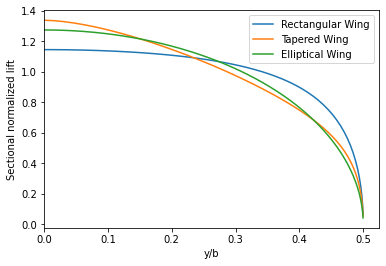

In [ ]:
#Solution for question 2
#The sectional_lift returns the sectional lift of a function
def sectional_lift(theta,A):
    #Creating an array to store the sectional lift coefficients
    s_lift=[]
    for th in theta:
        x=0
        for i in range(50):
            x+=A[i]*math.sin((2*i+1)*math.radians(th))
        #calculating and add the sectional lift to the list 
        s_lift.append(4*x/(A[0]*math.pi))
    return s_lift

#Creating equally spaced theta values (in degrees, which are later converted into radians)
theta=np.arange(1.8,91.8,1.8)
ybyb=[(0.5*math.cos(math.radians(th))) for th in theta]
N=np.arange(1,100,2)
tr_rect=[1]
tr_tapered=[0.35]
ar=6
#Estimating the coefficients for Rectangular wing, since the flag is false the delta_function gives coeffecients
A_rect=delta_function(ar,tr_rect,theta,N,False)

A_tapered=delta_function(ar,tr_tapered,theta,N,False)

#The theta values and the coefficients are passed to sectional_lift function to obtain the sectional lift
sect_lift_rect=sectional_lift(theta,A_rect)
sect_lift_tap=sectional_lift(theta,A_tapered)
sect_lift_ellip=[(4*math.sin(math.radians(th))/math.pi) for th in theta]

#Plotting the sectional lift vs y/b
plt.plot(ybyb,sect_lift_rect,label="Rectangular Wing")
plt.plot(ybyb,sect_lift_tap,label="Tapered Wing")
plt.plot(ybyb,sect_lift_ellip,label="Elliptical Wing")
plt.xlim(0)
plt.xlabel("y/b")
plt.ylabel("Sectional normalized lift")
plt.legend()


Discussion:

-In the Delta vs Taper ratio plot we can observe that as the taper ratio increases delta decreases first reaches a minimum value and then increase.

-For a given Taper ratio we have larger value of delta for a larger aspect ratio.

-In the sectional normalized lift vs y/b plot we can observer that the variation of lift of tapered wing with taper ratio 0.35 is close to elliptical wing. 